In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("supermarket_sales.csv")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [4]:
### how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [5]:
m_amount = len(df[df['Gender'] == 'Male']) # 570 male
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,507
1,purchases by female,493


#### Question 2

In [6]:
### what is the average Rating for products in the "Health and beauty" Product line?

In [7]:
# Filter the DataFrame to include only rows where the "Product line" column is "Health and beauty"
df_filtered = df[df["Product line"] == "Health and beauty"]

# Calculate the average rating
result = pd.DataFrame(
    {"Average rating": df_filtered["Rating"].mean()}, index=[0])

print(result)

   Average rating
0        7.003289


#### Question 3

In [8]:
### how many products in each Product line were sold during the first half (days 1-15 including) of March 2019?
### use the 'Quantity' column for that purpose - the number of products purchased

In [9]:
# Convert the "Date" column to a datetime data type
df["Date"] = pd.to_datetime(df["Date"])

# Filter the DataFrame to include only rows where the "Date" column is in the range from "3/1/2019" to "3/15/2019" inclusive
df_filtered = df[(df["Date"] >= "2019-03-01") & (df["Date"] <= "2019-03-15")]

# Group the rows by the "Product line" column and sum the values in the "Quantity" column for each group
result = df_filtered.groupby("Product line")["Quantity"].sum()

print(result)

Product line
Electronic accessories    181
Fashion accessories       152
Food and beverages        155
Health and beauty         214
Home and lifestyle        221
Sports and travel         168
Name: Quantity, dtype: int64


#### Question 4

In [10]:
### plot a bar chart showing the number of products per category computed in the previous question

<AxesSubplot: xlabel='Product line'>

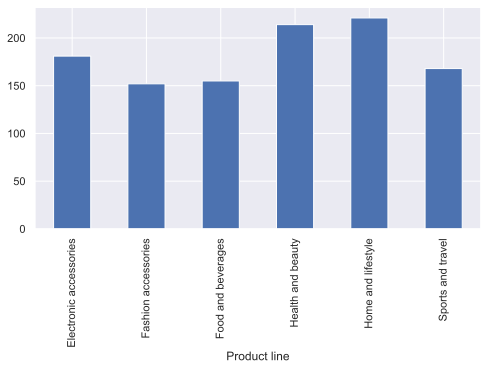

In [11]:
result.plot.bar()

#### Question 5

In [12]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

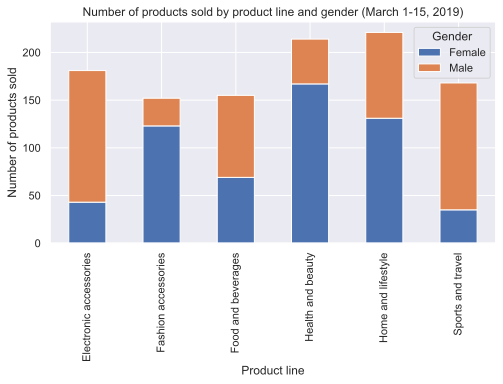

In [13]:
# Group the rows by the "Product line" and "Gender" columns and sum the values in the "Quantity" column for each group
result = df_filtered.groupby(["Product line", "Gender"])["Quantity"].sum()

# Pivot the data so that the product lines are the columns and the genders are the rows
result = result.unstack()

# Plot the data as a stacked bar chart
result.plot.bar(stacked=True)

# Add a title and axis labels
plt.title("Number of products sold by product line and gender (March 1-15, 2019)")
plt.xlabel("Product line")
plt.ylabel("Number of products sold")

# Show the plot
plt.show()

#### Question 6

In [14]:
### what is the total sales ('Total') done by each Payment type during the whole period?

In [15]:

# Group the rows by the "Product line" column and sum the values in the "Quantity" column for each group
result = df.groupby("Payment")["Total"].sum()
print(result)

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64


#### Question 7

In [16]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### use the full data you have in the dataset (not the first two weeks of March)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week

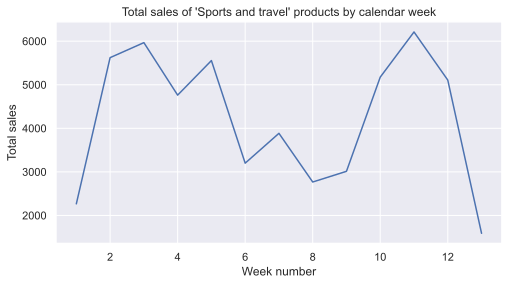

In [17]:
from datetime import date

# Filter the DataFrame to include only rows where the "Product line" column is "Sports and travel"
df_filtered = df[df["Product line"] == "Sports and travel"].copy()

# Convert the "Date" column to a datetime data type and extract the week number from each date
df_filtered["Date"] = pd.to_datetime(df_filtered["Date"])
df_filtered["Week"] = df_filtered["Date"].dt.isocalendar().week

# Group the rows by the "Week" column and sum the values in the "Total" column for each group
result = df_filtered.groupby("Week")["Total"].sum()

# Plot the data as a line chart
result.plot()

# Add a title and axis labels
plt.title("Total sales of 'Sports and travel' products by calendar week")
plt.xlabel("Week number")
plt.ylabel("Total sales")

# Show the plot
plt.show()


#### Question 8

In [18]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

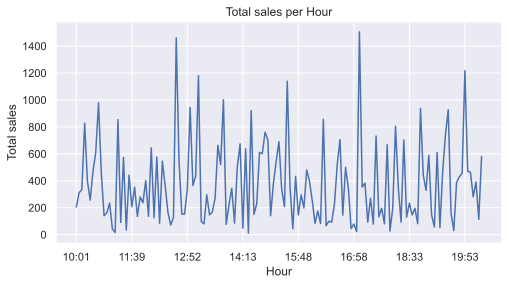

In [19]:
# Get Hour for each row
df["Time"] = pd.to_datetime(df["Time"]).dt.hour

result = df_filtered.groupby("Time")["Total"].sum()

# Plot the data as a line chart
result.plot()

# Add a title and axis labels
plt.title("Total sales per Hour")
plt.xlabel("Hour")
plt.ylabel("Total sales")

# Show the plot
plt.show()

#### Question 9

In [20]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

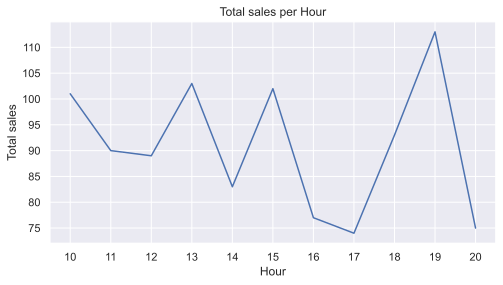

In [24]:
df = pd.read_csv('supermarket_sales.csv')
df["Hour"] = pd.to_datetime(df["Time"]).apply(lambda x:x.strftime('%H'))

df_group = df.groupby("Hour").size()
plt.plot(df_group)

# Add a title and axis labels
plt.title("Total sales per Hour")
plt.xlabel("Hour")
plt.ylabel("Total sales")

# Show the plot
plt.show()


#### Question 10

In [22]:
### what is the total income of strategic products by City?
### for each strategic product (as detailed in the product_types_strategy.csv file), 
### display break down of total sales by cities:
### a table with three columns: (1) product line, (2) city and (3) total sales for that line in the city

In [23]:
# Load the transactions data and the strategic product types
transactions = pd.read_csv("supermarket_sales.csv")
strategic_products = pd.read_csv("product_types_strategy.csv")

# Filter the transactions data to include only the strategic products
strategic_transactions = transactions[transactions["Product line"].isin(
    strategic_products["Product type"])]

# Group the data by city and product line, and compute the total sales for each group
total_sales = transactions.groupby(
    ["City", "Product line"])["Total"].sum()

# Pivot the data so that the product lines are the rows and the cities are the columns
pivoted = total_sales.reset_index().pivot(
    index="Product line", columns="City", values="Total")

# Convert the product lines and cities into columns
result = pivoted.reset_index()

# Rename the columns
result.columns = ["Product line", "City 1", "City 2", "City 3"]

# Print the result
print(result)


             Product line      City 1      City 2      City 3
0  Electronic accessories  17051.4435  18968.9745  18317.1135
1     Fashion accessories  16413.3165  21560.0700  16332.5085
2      Food and beverages  15214.8885  23766.8550  17163.1005
3       Health and beauty  19980.6600  16615.3260  12597.7530
4      Home and lifestyle  17549.1645  13895.5530  22417.1955
5       Sports and travel  19988.1990  15761.9280  19372.6995
